In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
cars = pd.read_csv('./cars_encoded_no_outliers.csv')

In [49]:
X = cars.drop('price', axis=1)
y = cars['price']

# Натренируем несколько моделей и проверим их перфоманс
1. Linear regression
2. Lasso regression
3. Ridge regression
4. Desicion Tree regression
5. Random Forest regression
6. Gradient Boosting regression

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

In [51]:
def fit_evaluate(estimator):
    res_reg = cross_validate(
        estimator,
        X,
        y,
        cv=4,
        scoring="neg_root_mean_squared_error",
        return_train_score=True, 
        return_estimator=True
    )
    return res_reg['test_score'].mean() * -1, res_reg['estimator']

In [52]:
linear_regression = LinearRegression(normalize=True, n_jobs=-1)
lin_reg_test_score, lin_reg_tup = fit_evaluate(linear_regression)

In [53]:
lin_reg, _, _, _ = lin_reg_tup

In [54]:
lin_reg_test_score

982679.5753482349

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [56]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33)

In [57]:
def grid_search(estimator, param_grid, X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val):
    grid_search = GridSearchCV(
        estimator,
        param_grid=param_grid,
        n_jobs=-1,
        scoring="neg_root_mean_squared_error",
        cv=4
    )
    grid_search.fit(X_train, y_train)
    best_estimator = grid_search.best_estimator_
    grid_search_test = np.sqrt(mean_squared_error(y_val, best_estimator.predict(X_val))).mean()
    return best_estimator, grid_search_test

In [58]:
from sklearn.linear_model import Lasso

In [59]:
param_grid = {
    'alpha': np.arange(0.0, 3.0, 0.1)
}

In [60]:
lasso_reg, lasso_reg_test_score = grid_search(Lasso(), param_grid)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1536669965995990.8, tolerance: 1083528681165.7727
  model = cd_fast.enet_coordinate_descent(


In [61]:
lasso_reg_test_score

965789.5050388869

In [62]:
from sklearn.linear_model import Ridge

In [63]:
param_grid = {
    'alpha': np.arange(0.0, 3.0, 0.1)
}

In [64]:
ridge_reg, ridge_reg_test_score  = grid_search(Ridge(), param_grid)

In [65]:
ridge_reg_test_score

965768.678714698

In [66]:
from sklearn.tree import DecisionTreeRegressor

In [67]:
param_grid = {
    'max_depth': range(2, 10, 4),
    'min_samples_split': range(3, 9, 2),
    'min_samples_leaf': range(4, 10, 2),
    'max_leaf_nodes': range(5, 20, 5)
}

In [68]:
ds_reg, ds_reg_test_res = grid_search(DecisionTreeRegressor(), param_grid)

In [69]:
ds_reg_test_res

840792.6138839751

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
param_grid = {
    'n_estimators': range(1000, 4000, 1000),
    'max_depth': range(2, 10, 4),
    'min_samples_split': range(3, 9, 2),
    'min_samples_leaf': range(4, 10, 2),
    'max_leaf_nodes': range(5, 20, 5)
}

In [72]:
rf_reg, rf_reg_test_res = grid_search(RandomForestRegressor(), param_grid)

In [73]:
rf_reg_test_res

721547.183772586

In [74]:
from sklearn.ensemble import GradientBoostingRegressor

In [75]:
param_grid = {
    'n_estimators': range(1000, 4000, 1000),
    'max_depth': range(2, 10, 4),
    'min_samples_split': range(3, 9, 2),
    'min_samples_leaf': range(4, 10, 2),
    'max_leaf_nodes': range(5, 20, 5)
}

In [76]:
grad_reg, grad_reg_test_res = grid_search(GradientBoostingRegressor(), param_grid)

In [77]:
grad_reg_test_res

431554.7964696222

In [78]:
res = [lin_reg_test_score, lasso_reg_test_score, ridge_reg_test_score, \
       rf_reg_test_res, grad_reg_test_res, ds_reg_test_res]
names = ["Linear Regressor", "Lasso Regressor", "Ridge Regressor", \
         "Random Forest Regressor", "Gradient Boosting Regressor", "Decision Tree Regressor"]

In [79]:
result_models_df = pd.DataFrame({'names': names, 'test_score': res})

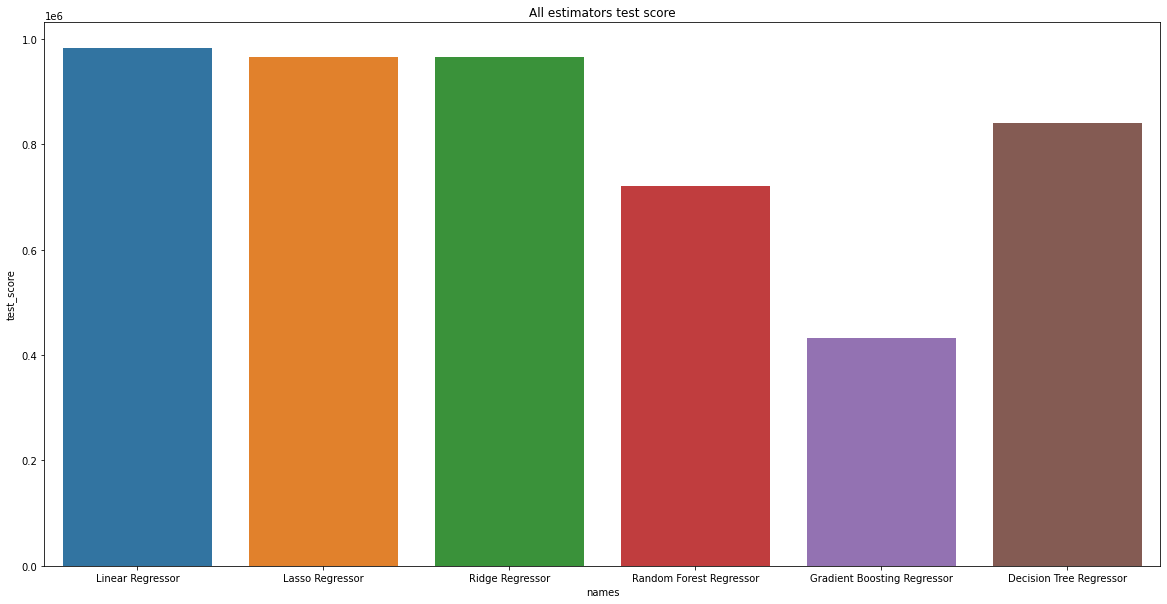

In [80]:
plt.figure(figsize=(20, 10))
estimators = sns.barplot(x='names', y='test_score', data=result_models_df);
estimators.set_title("All estimators test score");

In [81]:
from sklearn.ensemble import StackingRegressor

In [82]:
estimators = [ridge_reg, rf_reg, grad_reg]
names = ["Ridge Regressor", "Random Forest Regressor", "Gradient Boosting Regressor"]

In [83]:
estimators_n_name = list(zip(names, estimators))
estimators_n_name

[('Ridge Regressor', Ridge(alpha=0.1)),
 ('Random Forest Regressor',
  RandomForestRegressor(max_depth=6, max_leaf_nodes=15, min_samples_leaf=8,
                        min_samples_split=5, n_estimators=1000)),
 ('Gradient Boosting Regressor',
  GradientBoostingRegressor(max_depth=6, max_leaf_nodes=10, min_samples_leaf=4,
                            min_samples_split=5, n_estimators=1000))]

In [84]:
stacking_reg = StackingRegressor(estimators_n_name, final_estimator=RandomForestRegressor(n_estimators=3000), \
                                 cv=4, n_jobs=-1)

In [85]:
stacking_reg.fit(X_train, y_train)

StackingRegressor(cv=4,
                  estimators=[('Ridge Regressor', Ridge(alpha=0.1)),
                              ('Random Forest Regressor',
                               RandomForestRegressor(max_depth=6,
                                                     max_leaf_nodes=15,
                                                     min_samples_leaf=8,
                                                     min_samples_split=5,
                                                     n_estimators=1000)),
                              ('Gradient Boosting Regressor',
                               GradientBoostingRegressor(max_depth=6,
                                                         max_leaf_nodes=10,
                                                         min_samples_leaf=4,
                                                         min_samples_split=5,
                                                         n_estimators=1000))],
                  final_estimator=RandomForestRe

In [86]:
stacking_reg_test_score = np.sqrt(mean_squared_error(y_val, stacking_reg.predict(X_val))).mean()
stacking_reg_test_score

460975.82388611644

In [87]:
res = [ridge_reg_test_score, rf_reg_test_res, grad_reg_test_res, stacking_reg_test_score]

In [88]:
names.append("Stacking Regressor")

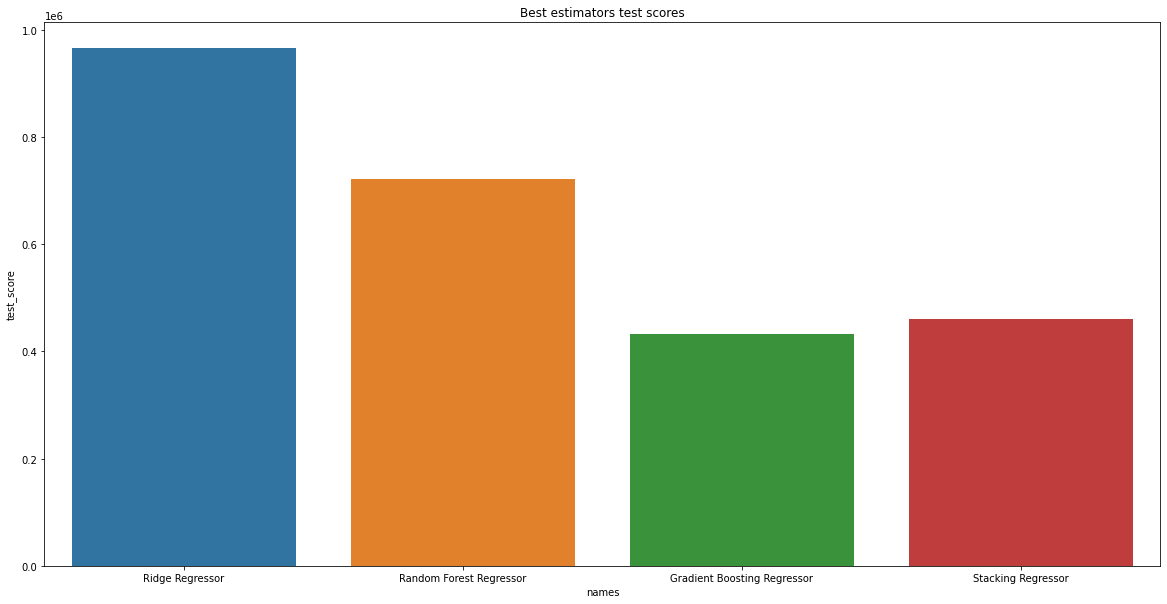

In [89]:
result_models_df = pd.DataFrame({'names': names, 'test_score': res})

plt.figure(figsize=(20, 10))
best_estimators_score = sns.barplot(x='names', y='test_score', data=result_models_df);
best_estimators_score.set_title("Best estimators test scores");

## Выведем свойства `feature_importance_` у моделей
Это поможет нам понять, какие фичи важнее остальных.

In [90]:
models_perfomance = pd.DataFrame({"Name": X.columns, \
                                  "Value": rf_reg.feature_importances_, \
                                  "Model_Name": "Random Forest Regressor"})

In [91]:
grad_reg_perfomance = pd.DataFrame({"Name": X.columns, \
                                    "Value": grad_reg.feature_importances_, \
                                    "Model_Name": "Gradient Boosting Regressor"})

In [92]:
models_perfomance = models_perfomance.append(grad_reg_perfomance, ignore_index=True)

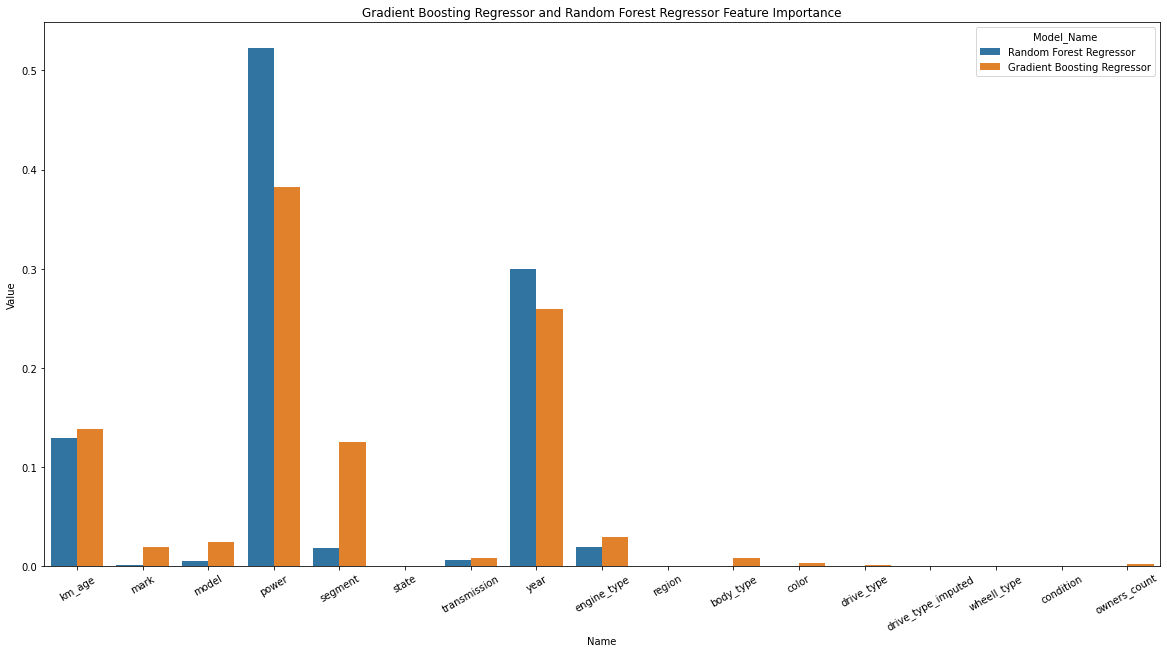

In [93]:
plt.figure(figsize=(20, 10))
grad_reg_perfomance_bar_plot = sns.barplot(x='Name', y='Value', hue='Model_Name', data=models_perfomance);
grad_reg_perfomance_bar_plot.set_xticklabels(models_perfomance['Name'].unique(), rotation=30);
grad_reg_perfomance_bar_plot.set_title("Gradient Boosting Regressor and Random Forest Regressor Feature Importance");

### Наиболее важными фича для моделей были:
1. Кол-во лошадиных сил
2. Год выпуска
3. Пробег
4. Сегмент
5. Тип двигателя